# Setup

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

# Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL_Project/task_1/train.csv', sep = ',')

In [ ]:
df.head(10)

,x,y,z
0,-24,749,-626
1,-206,930,-63
2,-139,763,-577
3,-503,441,-557
4,-278,705,-396
5,240,839,-310
6,-671,318,-213
7,-45,296,-927
8,102,294,-888
9,15,635,-671


In [ ]:
df.tail(10)

,x,y,z
144901,558,-803,-294
144902,558,-803,-294
144903,558,-802,-294
144904,559,-803,-294
144905,559,-803,-294
144906,559,-803,-294
144907,559,-803,-294
144908,559,-802,-295
144909,559,-803,-294
144910,559,-802,-294


In [ ]:
df.shape

(144911, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144911 entries, 0 to 144910
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   x       144911 non-null  int64
 1   y       144911 non-null  int64
 2   z       144911 non-null  int64
dtypes: int64(3)
memory usage: 3.3 MB


In [ ]:
t = range(0, len(df['x']) * 10, 10)
x = df['x']
y = df['y']
z = df['z']
t = range(0, len(x))

Text(0.5, 0, 'hours')

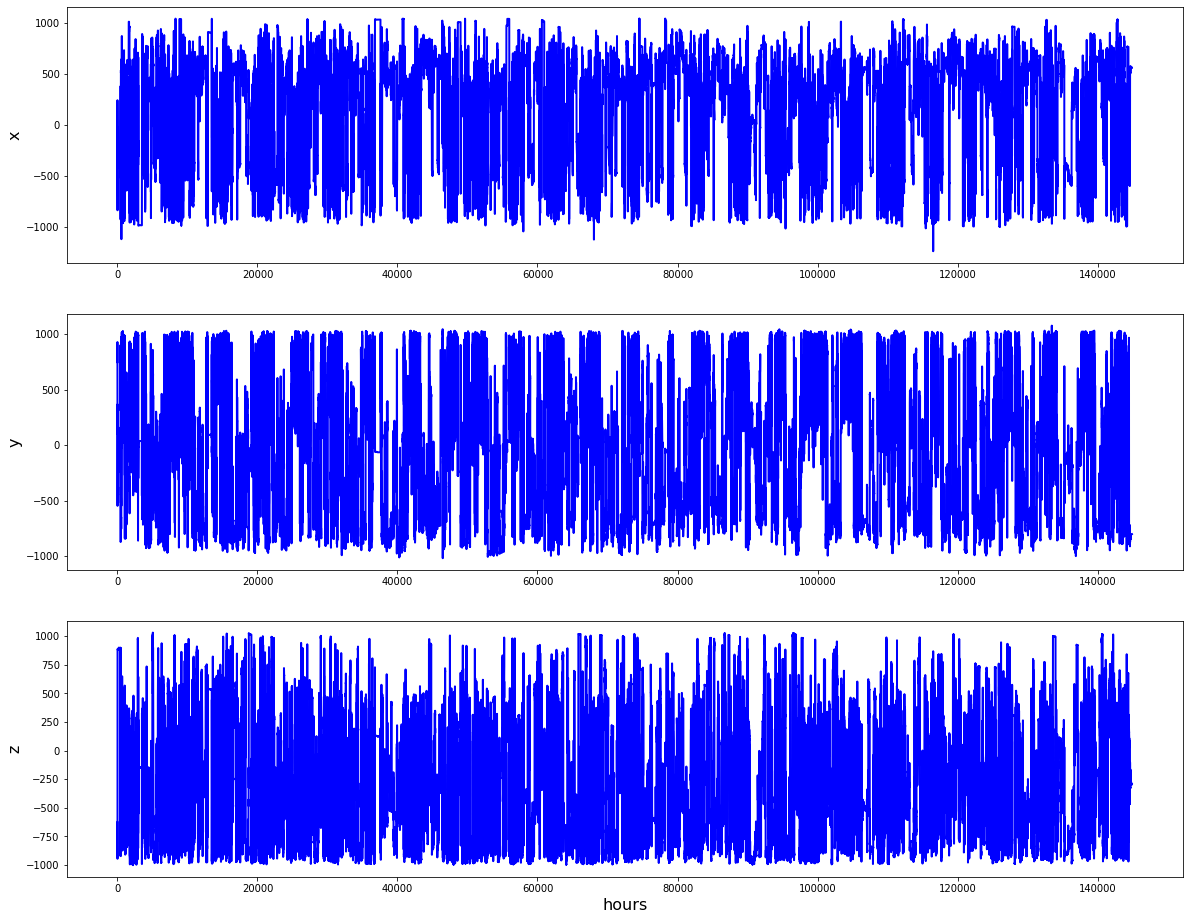

In [ ]:
fig, axs = plt.subplots(3, 1,figsize=(20, 16))

axes = ['x', 'y', 'z']

for i in range(3):
  if i == 0:
    axs[i].plot(t, x, color='b', linewidth=2)
  elif i == 1:
    axs[i].plot(t, y, color='b', linewidth=2)
  elif i == 2:
    axs[i].plot(t, z, color='b', linewidth=2)
  axs[i].set_ylabel(axes[i], size=16)

axs[2].set_xlabel('hours', size=16)

In [ ]:
x = df['x'][::360]
y = df['y'][::360]
z = df['z'][::360]
t = range(0, len(x))

Text(0.5, 0, 'hours')

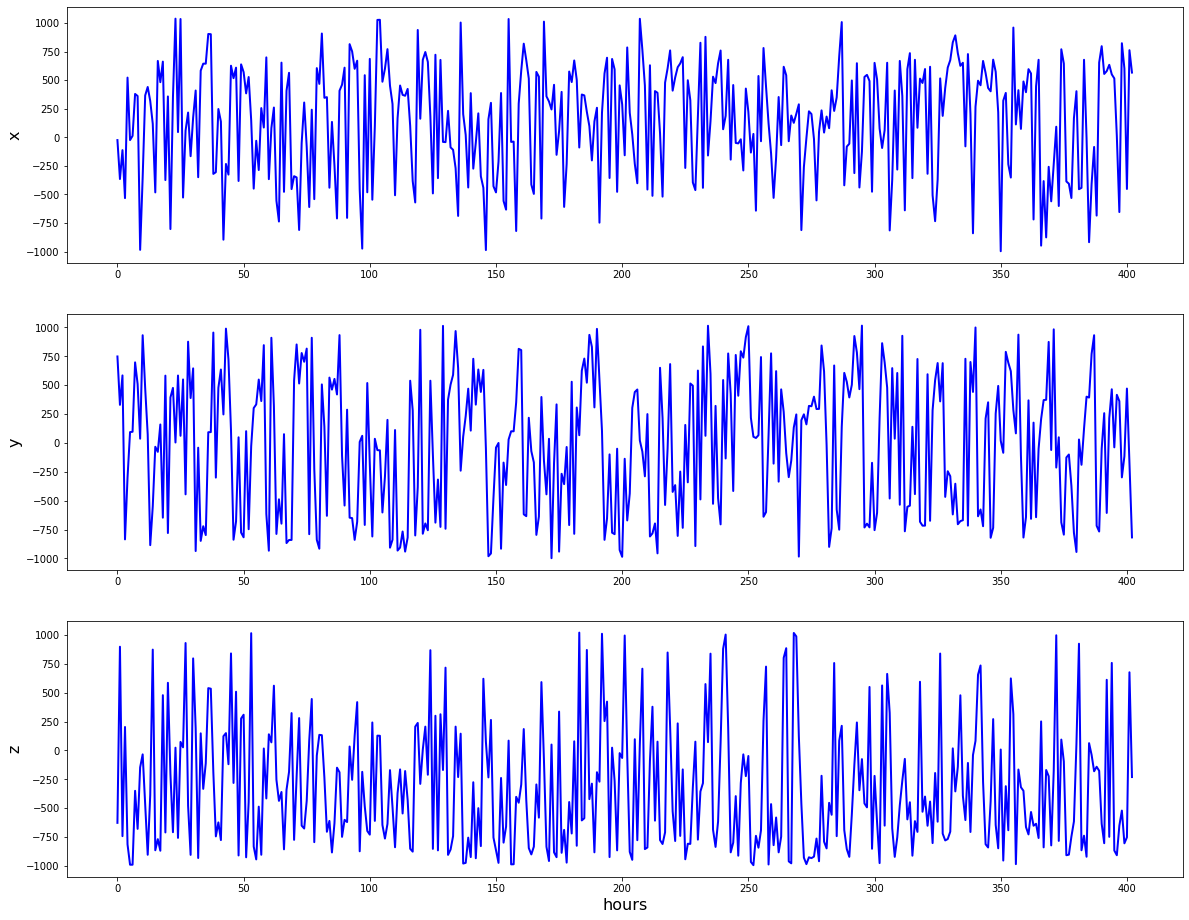

In [ ]:
fig, axs = plt.subplots(3, 1,figsize=(20, 16))

axes = ['x', 'y', 'z']

for i in range(3):
  if i == 0:
    axs[i].plot(t, x, color='b', linewidth=2)
  elif i == 1:
    axs[i].plot(t, y, color='b', linewidth=2)
  elif i == 2:
    axs[i].plot(t, z, color='b', linewidth=2)
  axs[i].set_ylabel(axes[i], size=16)

axs[2].set_xlabel('hours', size=16)


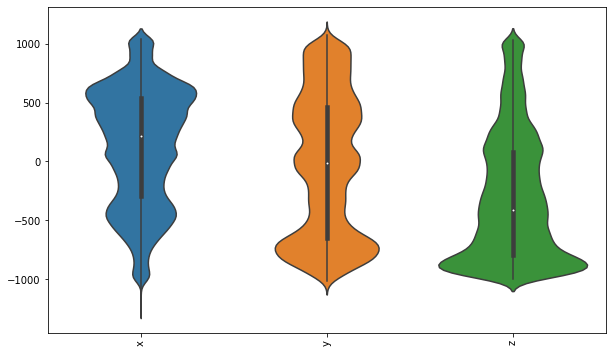

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df)
_ = ax.set_xticklabels(df.keys(), rotation=90)

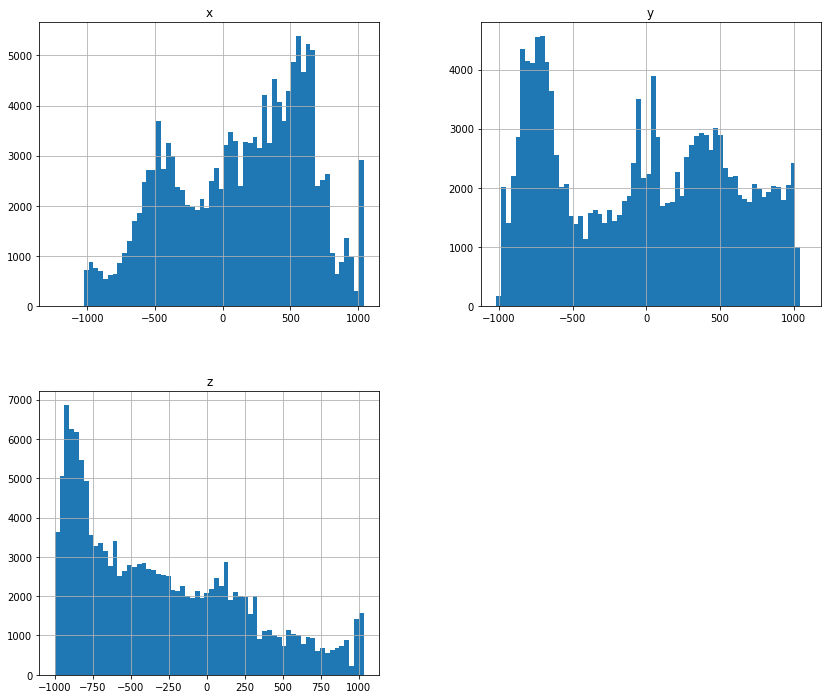

In [ ]:
df.hist(figsize = (14, 12), bins=64)
plt.show()

## Inspect and cleanup

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
x,144911.0,132.732967,491.697810,-1239.0,-291.0,214.0,539.0,1039.0
y,144911.0,-34.800146,594.977813,-1019.0,-646.0,-14.0,466.0,1078.0
z,144911.0,-307.588768,538.335654,-1001.0,-794.0,-416.0,83.0,1032.0


In [ ]:
df.isnull().sum()

x    0
y    0
z    0
dtype: int64

## Feature engineering

## Split the data

In [ ]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.8)]
valid_df   = df[int(n*0.8):]

num_features = df.shape[1]

In [ ]:
train_df.shape

(115928, 3)

In [ ]:
valid_df.shape

(28983, 3)

## Normalize the data

In [ ]:
scaler = MinMaxScaler(feature_range=(-1,1))

train = scaler.fit_transform(train_df)
valid = scaler.transform(valid_df)


In [ ]:
np.min(train), np.max(train)

(-1.0, 1.0)

In [ ]:
np.min(valid), np.max(valid)

(-1.1053604436229205, 1.0309927360774818)

# Data windowing

In [22]:
def split(data, win_size=30, win_shift=6, offset=1):

  rows = np.arange(win_size, len(data) - win_shift - 1, win_shift)

  samples = np.zeros((len(rows), win_size, data.shape[-1]))
  targets = np.zeros((len(rows),))

  for j, row in enumerate(rows):
    samples[j] = data[j * win_shift: row]
    targets[j] = data[row: row + offset]

  return samples, targets